In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [77]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [78]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [79]:
df.shape

(6607, 20)

In [80]:
df.dropna().head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [81]:
df = df.dropna(axis=1)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Public,Positive,3,No,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Public,Negative,4,No,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Public,Neutral,4,No,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Public,Negative,4,No,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,Public,Neutral,4,No,Female,70


In [82]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Gender                        0
Exam_Score                    0
dtype: int64

In [83]:
df = df.fillna(df.median(numeric_only = True))

In [84]:
X = df[["Hours_Studied"]]
y = df ["Exam_Score"]

In [85]:
X_train,X_test, y_train,y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [86]:
# Linear_Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [87]:
y_pred_lin = lin_reg.predict(X_test)
y_pred_lin

array([67.22454236, 67.79587985, 67.5102111 , ..., 68.08154859,
       67.5102111 , 68.08154859])

In [88]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [89]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [90]:
y_pred_poly = poly_reg.predict(X_test_poly)
y_pred_poly

array([67.17752589, 67.75427873, 67.46459307, ..., 68.04658285,
       67.46459307, 68.04658285])

In [91]:
print("linear R^2-->: ", r2_score(y_test, y_pred_lin))
print("Linear RMSE-->: ", mean_squared_error(y_test, y_pred_lin))

linear R^2-->:  0.2319868674542105
Linear RMSE-->:  10.855921288793322


In [92]:
print("Polynomial R^2-->: ", r2_score(y_test, y_pred_poly))
print("Polynomial RMSE-->: ", mean_squared_error(y_test, y_pred_poly))

Polynomial R^2-->:  0.23276034442853466
Polynomial RMSE-->:  10.84498813570501


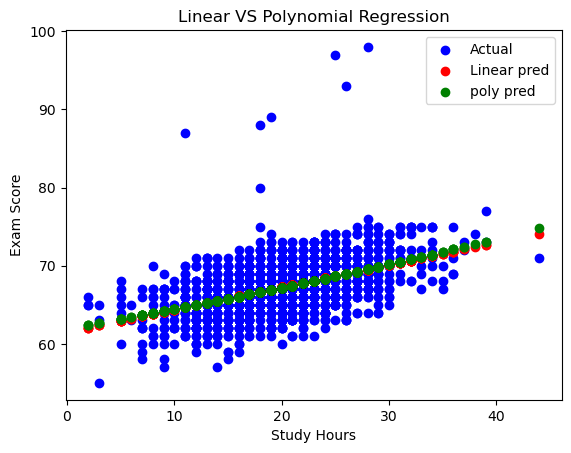

In [93]:
plt.scatter(X_test, y_test, color = "blue", label = "Actual")
plt.scatter(X_test, y_pred_lin, color = "red", label = "Linear pred")
plt.scatter(X_test, y_pred_poly, color = "green", label = "poly pred")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.legend()
plt.title("Linear VS Polynomial Regression")
plt.show()